# Day 3 - Data Science Essentials Program
EMEA - Apr 2024

**Agenda for Today**

*Morning*
- FF3 Model Takeup
- Classification:
    - Logistic Regressins

*Afternoon*
- Decision Trees

## Fama French 3 Factor Model Takeup

- Recap of CAPM --> 1 -factor model --> 1 X variable we're using
    - rStock = rf + beta * MRP
        - MRP = market - rf
    - rStock - rf = beta * MRP 
        - y = rStock - rf
        - x = MRP
        - beta --> slope of the line

In [1]:
#Step 1 - Import packages and data
import pandas as pd
import statsmodels.api as sm

In [2]:
import matplotlib.pyplot as plt

In [36]:
aapl = pd.read_csv("StockData/AAPL.csv", parse_dates=['Date'], date_format="%m/%d/%y",
                  index_col=['Date'])
# aapl.info()

In [37]:
ff3 = pd.read_csv("ExData/ff3_daily.csv", parse_dates=['date'],
                 index_col=['date'])
            #not needed here, but could have done date_format ="%Y%m%d" e.g. 19260701
# ff3.tail()
# ff3.info()

In [57]:
#Step 2 -data cleaning, calcs and merge
aapl['Returns'] = aapl['Adj Close'].pct_change() * 100
# aapl['Returns'] *= 100
            # x*=100 ---> x = x * 100
                # x +=1 ---> x = x + 1
# aapl.head()

In [58]:
# data = ff3.merge(aapl, how='inner', left_on='date', right_on='Date')
data = ff3.merge(aapl, how='inner', left_index=True, right_index=True)
data.dropna(inplace=True)

In [49]:
# data['Returns'].plot()

In [59]:
data['Stock Excess Returns'] = data['Returns'] - data['RF']
# data.head()
# data.info()

In [50]:
data.columns

Index(['Mkt-RF', 'SMB', 'HML', 'RF', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Returns'],
      dtype='object')

In [85]:
#Step 3 - run the OLS model
X = data[['Mkt-RF', 'SMB', 'HML']] # Mkt-RF = MRP = market risk premium
X_const = sm.add_constant(X)
y = data['Stock Excess Returns']

In [62]:
# X_const.head()
model = sm.OLS(y, X)
results = model.fit()
results2 = sm.OLS(y, X_const).fit()

In [66]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Stock Excess Returns   R-squared (uncentered):                   0.352
Model:                              OLS   Adj. R-squared (uncentered):              0.351
Method:                   Least Squares   F-statistic:                              227.6
Date:                  Thu, 11 Apr 2024   Prob (F-statistic):                   6.91e-118
Time:                          05:12:42   Log-Likelihood:                         -1952.5
No. Observations:                  1258   AIC:                                      3911.
Df Residuals:                      1255   BIC:                                      3926.
Df Model:                             3                                                  
Covariance Type:              nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.0133      0.041     24.647      0.000       0.933       1.094
SMB           -0.2589      0.065     -3.954      0.000      -0.387      -0.130
HML           -0.5551      0.067     -8.237      0.000      -0.687      -0.423
==============================================================================
Omnibus:                      227.246   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3620.127
Skew:                           0.319   Prob(JB):                         0.00
Kurtosis:                      11.286   Cond. No.                         1.79
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Stock Excess Returns   R-squared:                       0.350
Model:                              OLS   Adj. R-squared:                  0.348
Method:                   Least Squares   F-statistic:                     224.8
Date:                  Thu, 11 Apr 2024   Prob (F-statistic):          1.11e-116
Time:                          05:12:49   Log-Likelihood:                -1951.3
No. Observations:                  1258   AIC:                             3911.
Df Residuals:                      1254   BIC:                             3931.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0491      0.032      1.519      0.129      -0.014       0.112
Mkt-RF         1.0091      0.041     24.502      0.000       0.928       1.090
SMB           -0.2567      0.065     -3.923      0.000      -0.385      -0.128
HML           -0.5526      0.067     -8.201      0.000      -0.685      -0.420
==============================================================================
Omnibus:                      227.104   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3618.842
Skew:                           0.318   Prob(JB):                         0.00
Kurtosis:                      11.285   Cond. No.                         2.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
data['Predict no const'] = results.predict(X)
data['Predict w const'] = results2.predict(X_const)

In [72]:
results.rsquared, results2.rsquared

(0.3523547125232477, 0.3497051333474237)

In [73]:
results2.pvalues

const      1.291321e-01
Mkt-RF    1.179096e-108
SMB        9.211709e-05
HML        5.858543e-16
dtype: float64

In [89]:
#Q&A: Visualizing multivariate models - hard to show more than one x on a graph
#at most we can easily do is a 2-factor model with a 3-d chart (x, y, z)
import plotly.express as px
X2 = data[['Mkt-RF', 'SMB']]
results3 = sm.OLS(y, X2).fit()
results3.summary()
data['Predict 2 factors'] = results3.predict(X2)

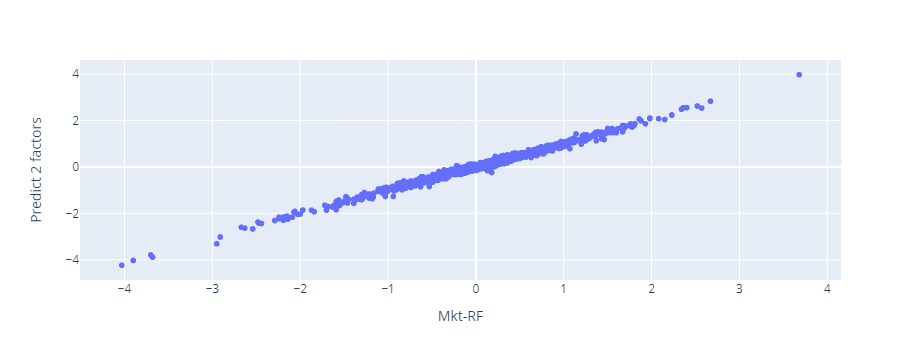

In [93]:
px.scatter(data, x ='Mkt-RF', y='Predict 2 factors')

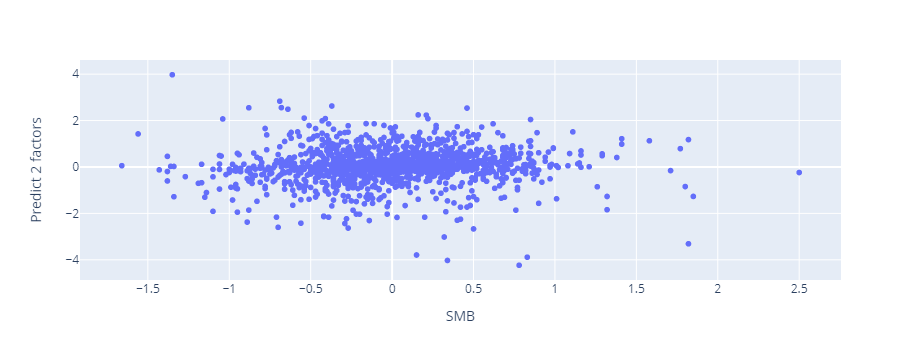

In [94]:
px.scatter(data, x ='SMB', y='Predict 2 factors')

In [97]:
px.scatter_3d(data, x='Mkt-RF', y='Predict 2 factors', z='SMB', width=800, height=600)

# Logistic Regressions

**Coffee break until 10:40am BST / 5:40am EST**
- when you're back from coffee import the packages below
    - can copy from `LogisticRegression.ipynb` file

In [74]:
import os #package useful for finding files and folders on computer

#data manipulation
import numpy as np #array/matrix manipulation, extra math calcs (e.g. exp, log, etc.)
import pandas as pd

#visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#Classification models and metrics
from sklearn.linear_model import LogisticRegression
from scipy.special import expit #faster way to do sigmoid

#Classification metrics to compare performance of models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

## Intuition behind the logistic function (sigmoid)

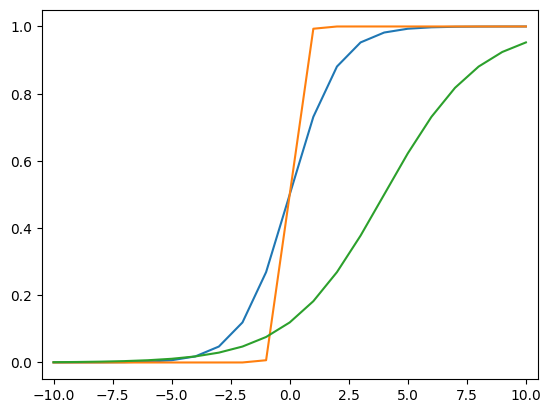

In [113]:
x = np.arange(-10,11,1)
y = 1/(1+np.exp(-1 * (x)))
y2 = 1/(1+np.exp(-1 * (5* x)))
y3 = 1/(1+np.exp(-1 * (0.5* x- 2)))
y3 = expit(0.5*x - 2) #same as previous line

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.xlim([-10.5, 10.5])
plt.show()

## Log Regression on Exams Data Set

In [116]:
df = pd.read_csv("ExData/score.csv")
df['Outcome'] = df['Scores'].apply(lambda x: 1 if x>=50 else 0)
                #   lambda input: output

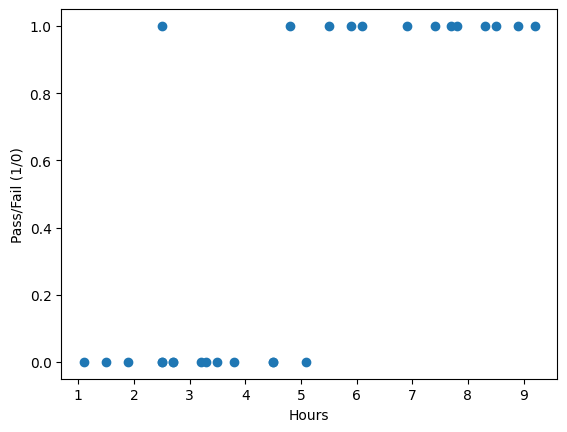

In [120]:
plt.scatter(df['Hours'], df['Outcome'])
plt.xlabel('Hours')
plt.ylabel('Pass/Fail (1/0)')
plt.show()

In [124]:
df['Hours'].shape, df[['Hours']].shape

((27,), (27, 1))

In [139]:
X = df[['Hours']]   # the inputs to models have to 2-D, not one series
y = df['Outcome']
model = LogisticRegression()

In [140]:
model.fit(X, y)

LogisticRegression()

In [141]:
df['Forecast'] = model.predict(X) #always uses a 50% prob cutoff
# df

In [156]:
df.head()

,Hours,Scores,Outcome,Forecast,Probability,50% prob cutoff,80% prob cutoff
0,2.5,21,0,0,0.065538,0,0
1,5.1,47,0,1,0.574404,1,0
2,3.2,27,0,0,0.134566,0,0
3,8.5,75,1,1,0.984737,1,1
4,3.5,30,0,0,0.179467,0,0


In [160]:
#model.predict_proba(X) #creates a matrix of the probabilities
    #column 0 --> probability of that X being a Y = 0
    #column 1 --> probability of that X being a Y = 1

In [148]:
model.intercept_, model.coef_ 
df['Probability'] = expit(model.intercept_ + model.coef_ * X)
df['50% prob cutoff'] = df['Probability'].apply(lambda x: 1 if x>=0.5 else 0)
        # model.predict uses 50% cutoff like this
df['80% prob cutoff'] = df['Probability'].apply(lambda x: 1 if x>=0.8 else 0)

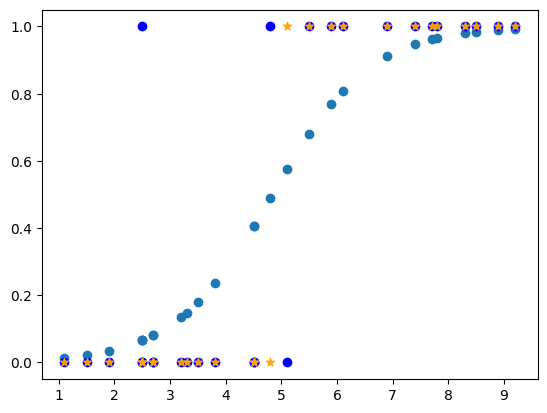

In [152]:
plt.scatter(df['Hours'], df['Probability'])
plt.scatter(df['Hours'], df['Outcome'], marker='o', color='blue') #Actuals, real students
plt.scatter(df['Hours'], df['Forecast'], color='orange', marker='*', alpha=0.9) #Predictions using 50% cutoff

### Confusion Matrix
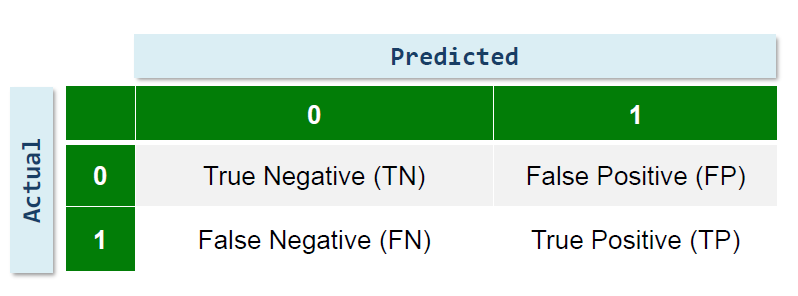

In [161]:
confusion_matrix(df['Outcome'], df['Forecast'])

array([[13,  1],
       [ 2, 11]], dtype=int64)

In [162]:
#Accuracy
(13 + 11) / 27

0.8888888888888888

In [163]:
#Recall = TP / (all actual positives)
        # Ratio of True positives as a % of REAL values
11 / (2 + 11)

0.8461538461538461

In [164]:
#Precision = TP / (forecast of all positives)
    # Precision --> TP % of Predicted positives 
11 / (11+1)

0.9166666666666666

## Lunch Break until 1pm BST / 8am EST

## Metrics to Use for Classification
- Recall --> TP as % of **R**eal values (only looking at the 1's, the positives)
- Precision --> TP as % of **P**redicted values (only looking at the 1s)
- F1 score --> harmonic average of Recall and Precision
    - cannot use a simple average, because the numerator is the same, but not the denominator
- Accuracy --> **A**ll correct predictions (TP+TN) as % of **A**ll observations

Example: 1mm credit card tx, 10 actual frauds
Scenario 1:
- if my model finds 2 frauds and both are correct --> recall = 2 / 10 --> 20%
- 2 /2 are correct --> precision is 100%

Scenario 2: it found 15 frauds --> 10 were actual frauds, 5 were not
- recall --> 10/10 --> 100% recall
- precision --> 10/15 --> 60% precision

Scenario 3: it found 0 frauds
- precision: 0%
- recall: 1/10 --> 0%
- Accuracy could be 99.999% because model is predicting 0 frauds, and most of the tx were correct (not frauds)

In [166]:
print(classification_report(df['Outcome'], df['Forecast']))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.92      0.85      0.88        13

    accuracy                           0.89        27
   macro avg       0.89      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27



## Logistic Regression - Car Purchase Dataset 

In [172]:
df = pd.read_csv("ExData/car_data.csv", index_col=['User ID'])
# df.info()
# df.head()

In [175]:
df['Purchased'].value_counts(normalize=True)
    #normalize --> shows as a %

Purchased
0    0.598
1    0.402
Name: proportion, dtype: float64

In [177]:
df[['Age','AnnualSalary','Purchased']].corr()

,Age,AnnualSalary,Purchased
Age,1.000000,0.166042,0.616036
AnnualSalary,0.166042,1.000000,0.364974
Purchased,0.616036,0.364974,1.000000


In [178]:
df.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


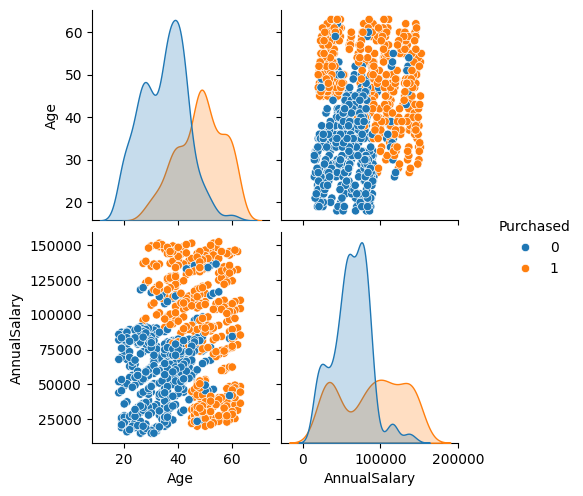

In [180]:
sns.pairplot(df, hue='Purchased')

In [189]:
X = df[['Age']]
X2 = df[['Age','AnnualSalary']]
y = df['Purchased']
clf_age = LogisticRegression()
clf_age.fit(X, y)
clf_age_salary = LogisticRegression(random_state=42)
clf_age_salary.fit(X2, y)

LogisticRegression(random_state=42)

In [190]:
y_predict1 = clf_age.predict(X)
y_predict2 = clf_age_salary.predict(X2)

In [191]:
#Model with just age
print(classification_report(y, y_predict1))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       598
           1       0.80      0.70      0.75       402

    accuracy                           0.81      1000
   macro avg       0.81      0.79      0.80      1000
weighted avg       0.81      0.81      0.81      1000



In [192]:
#Model with just age and salary
print(classification_report(y, y_predict2))
    #this is not a great model, becuase we haven't pre-processed the Salary column
    #salaries in the thousands, purchased column is just 0/1
    #logistic model doesn't work well with different scaling

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       598
           1       0.00      0.00      0.00       402

    accuracy                           0.60      1000
   macro avg       0.30      0.50      0.37      1000
weighted avg       0.36      0.60      0.45      1000



c:\users\v806013\ds\tools\python3.8\latest\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\users\v806013\ds\tools\python3.8\latest\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\users\v806013\ds\tools\python3.8\latest\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



import sklearn

In [197]:
import sklearn as sk

In [198]:
sk.__version__

'1.3.2'

In [201]:
# !pip install scikit-learn

**Coffee break until 2:30pm BST**

## Pre-processing data
- in older versions of sklearn - Logistic Regression doesn't handle well X variables that have different scaling, will have a hard time coming up with the optimal sigmoid function
    - in newer versions (sklearn >= 1.40) the "engine" behind is more efficient and handles better
- still a good idea to pre-process the data, to help speed up the computations
- Z-score --> common way to "standardize" data
    - z-score = (x - avg) / std  --> will change your data's average to be 0 and std = 1

In [210]:
from sklearn.preprocessing import StandardScaler
df['AnnualSalaryStd'] = StandardScaler().fit_transform(df[['AnnualSalary']])

In [211]:
df['Salary z-score'] = (df['AnnualSalary'] - df['AnnualSalary'].mean()) / df['AnnualSalary'].std()
df.describe()

,Age,AnnualSalary,Purchased,Salary z-score,AnnualSalaryStd
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,40.106000,72689.000000,0.402000,-1.776357e-18,8.881784e-19
std,10.707073,34488.341867,0.490547,1.000000e+00,1.000500e+00
min,18.000000,15000.000000,0.000000,-1.672710e+00,-1.673547e+00
25%,32.000000,46375.000000,0.000000,-7.629825e-01,-7.633642e-01
50%,40.000000,72000.000000,0.000000,-1.997777e-02,-1.998776e-02
75%,48.000000,90000.000000,1.000000,5.019377e-01,5.021889e-01
max,63.000000,152500.000000,1.000000,2.314144e+00,2.315302e+00


In [212]:
X3 = df[['Age','AnnualSalaryStd']]
clf_fixed = LogisticRegression()
clf_fixed.fit(X3, y)

LogisticRegression()

In [213]:
print(classification_report(y, clf_fixed.predict(X3)))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       598
           1       0.82      0.73      0.77       402

    accuracy                           0.83      1000
   macro avg       0.83      0.81      0.82      1000
weighted avg       0.83      0.83      0.83      1000



## Working Session until 3:30pm BST / 10:30am EST
- LogisticRegressionAssignment.ipynb
- Try questions 1 - 3
    - skip the ROC/AUC graphs and metric
    - focus on classification report
- Which set of X's results in the best model? 

## Takeup Logistic Assignment
- https://scikit-learn.org/stable/modules/model_evaluation.html

In [214]:
df = pd.concat([df, pd.get_dummies(df['Gender'])], axis=1)

In [228]:
df.head(2)

,Gender,Age,AnnualSalary,Purchased,Salary z-score,AnnualSalaryStd,Female,Male
User ID,,,,,,,,
385,Male,35,20000,0,-1.527734,-1.528498,False,True
681,Male,40,43500,0,-0.846344,-0.846767,False,True


In [233]:
X3 = df[['Age','Female','Male']]
y = df['Purchased']
clf_fixed = LogisticRegression()
clf_fixed.fit(X3, y)
print(classification_report(y, clf_fixed.predict(X3)))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       598
           1       0.80      0.70      0.75       402

    accuracy                           0.81      1000
   macro avg       0.81      0.79      0.80      1000
weighted avg       0.81      0.81      0.81      1000



In [220]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score,roc_auc_score

In [263]:
#Automating the X-columns to use for all the models
import itertools
#allXs = ['Age', 'Salary', 'Female','City','Title','Company']
allXs = ['Age', 'AnnualSalary', 'Female']
allCombos = []
for num in range(1,len(allXs)+1):
    combos = itertools.combinations(allXs, num)
    splits = [x for x in combos]
    allCombos.extend(splits)
len(allCombos), allCombos

(7,
 [('Age',),
  ('AnnualSalary',),
  ('Female',),
  ('Age', 'AnnualSalary'),
  ('Age', 'Female'),
  ('AnnualSalary', 'Female'),
  ('Age', 'AnnualSalary', 'Female')])

In [245]:
Xs = [['Age'],
      ['AnnualSalaryStd'], 
      ['Age','Female'],
      ['Age','AnnualSalaryStd'],
      ['AnnualSalaryStd','Female'],
      ['Age', 'AnnualSalaryStd','Female']
]

In [246]:
results = [] #empty list to store all the model metrics calculations

for columns in Xs:
    print(columns)
    X = df[columns]
    model = LogisticRegression()
    model.fit(X,y)
    y_predict = model.predict(X)
    print(classification_report(y, y_predict))

    #calculate scores
    p = precision_score(y, y_predict)
    r = recall_score(y, y_predict)
    f1 = f1_score(y, y_predict)
    a = accuracy_score(y, y_predict)
    roc_auc = roc_auc_score(y, model.predict_proba(X)[:, 1]) #2nd input is the probabilities of 1s

    results.append( {'Precision':p, 'Recall':r, 'Accuracy':a, 'F1':f1, 'X-cols':columns, 'AUC':roc_auc})


['Age']
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       598
           1       0.80      0.70      0.75       402

    accuracy                           0.81      1000
   macro avg       0.81      0.79      0.80      1000
weighted avg       0.81      0.81      0.81      1000

['AnnualSalaryStd']
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       598
           1       0.86      0.51      0.64       402

    accuracy                           0.77      1000
   macro avg       0.80      0.73      0.74      1000
weighted avg       0.79      0.77      0.76      1000

['Age', 'Female']
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       598
           1       0.80      0.70      0.75       402

    accuracy                           0.81      1000
   macro avg       0.81      0.79      0.80      1000
weighted avg       0.81     

In [254]:
# results[5]

In [250]:
models_comparison = pd.DataFrame(results)
# models_comparison.sort_values('Accuracy', ascending=False)
models_comparison

,Precision,Recall,Accuracy,F1,X-cols,AUC
0,0.801700,0.703980,0.811,0.749669,[Age],0.863095
1,0.864979,0.509950,0.771,0.641628,[AnnualSalaryStd],0.688314
2,0.801700,0.703980,0.811,0.749669,"[Age, Female]",0.863330
3,0.823034,0.728856,0.828,0.773087,"[Age, AnnualSalaryStd]",0.915182
4,0.865546,0.512438,0.772,0.643750,"[AnnualSalaryStd, Female]",0.686384
5,0.831461,0.736318,0.834,0.781003,"[Age, AnnualSalaryStd, Female]",0.915600


## Decision Tree

In [264]:
from sklearn import tree

In [265]:
df = pd.read_csv("ExData/score.csv")
df['Outcome'] = df['Scores'].apply(lambda x: 1 if x>=50 else 0)

In [268]:
df.head()

,Hours,Scores,Outcome
0,2.5,21,0
1,5.1,47,0
2,3.2,27,0
3,8.5,75,1
4,3.5,30,0


In [291]:
model = tree.DecisionTreeClassifier()

In [292]:
X = df[['Hours']]
y = df['Outcome']
model.fit(X, y)

DecisionTreeClassifier()

In [293]:
df['Predictions'] = model.predict(X)
print(classification_report(y, df['Predictions']))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13

    accuracy                           0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



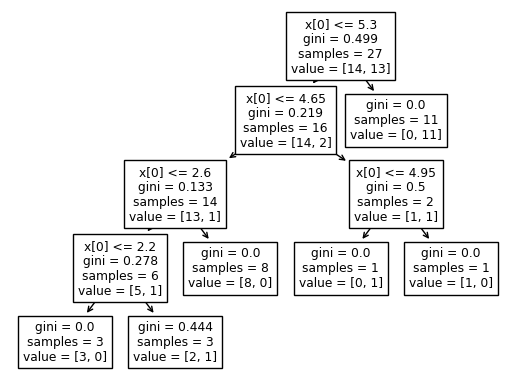

In [294]:
tree.plot_tree(model)
plt.show()